In [1]:
from Model import *

In [2]:
ds = DataSet()
X, y, classes, labels, idx, labels_r, X_train, y_train, X_test, y_test = ds.load_data()
print(labels)
print(labels_r)
print(idx)
print(len(X_train), len(X_test), len(y_train), len(y_test))

Loading Data


100%|██████████████████████████| 42000/42000 [00:01<00:00, 38416.30it/s]


Data Loaded
Creating Labels from the Classes


100%|███████████████████████████████| 10/10 [00:00<00:00, 242445.32it/s]


Created Labels from the Classes
Converting Data -> X,y + train,test
{1: 1, 7: 2, 3: 3, 9: 4, 2: 5, 6: 6, 0: 7, 4: 8, 8: 9, 5: 10}
{1: 1, 2: 7, 3: 3, 4: 9, 5: 2, 6: 6, 7: 0, 8: 4, 9: 8, 10: 5}
10
26250 15750 26250 15750


In [3]:
model = CNN(idx_of_classes=idx).to(DEVICE)
criterion = MSELoss()
optimizer = Adam(model.parameters(), lr=0.001)

In [5]:
hp = Help_Funcs()
(
    PROJECT_NAME,
    name,
    epochs,
    X_train,
    y_train,
    X_test,
    y_test,
    batch_size,
    device,
    model,
    criterion,
    optimizer,
) = hp.train(
    PROJECT_NAME,
    "BaseLine CNN",
    125,
    X_train.float().view(-1, 1, 28, 28).to(DEVICE),
    y_train.float().to(DEVICE),
    X_test.float().view(-1, 1, 28, 28),
    y_test.float().to(DEVICE),
    BATCH_SIZE,
    DEVICE,
    model,
    criterion,
    optimizer,
    labels_r,
)

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd


  0%|                                           | 0/125 [00:00<?, ?it/s]
0it [00:00, ?it/s]
2568it [00:00, 25675.98it/s]
5463it [00:00, 27598.28it/s]
8256it [00:00, 27745.55it/s]
11160it [00:00, 28252.05it/s]
14057it [00:00, 28508.19it/s]
16908it [00:00, 28462.68it/s]
19755it [00:00, 28333.35it/s]
22589it [00:00, 27317.51it/s]
26250it [00:00, 27369.47it/s]

0it [00:00, ?it/s]
2870it [00:00, 28692.64it/s]
5763it [00:00, 28830.69it/s]
8694it [00:00, 29048.60it/s]
11608it [00:00, 29081.95it/s]
15750it [00:00, 28728.05it/s]
  1%|▎                                  | 1/125 [00:04<10:18,  4.99s/it]
0it [00:00, ?it/s]
2448it [00:00, 24477.92it/s]
5327it [00:00, 27008.91it/s]
8252it [00:00, 28028.76it/s]
11118it [00:00, 28275.33it/s]
13946it [00:00, 28145.36it/s]
16858it [00:00, 28473.88it/s]
19758it [00:00, 28642.15it/s]
22654it [00:00, 28740.53it/s]
26250it [00:00, 28258.92it/s]

0it [00:00, ?it/s]
2566it [00:00, 25656.66it/s]
5248it [00:00, 26339.70it/s]
8084it [00:00, 27260.57it/s]
10811it 

Accuracy,▁▅▅▆▅▇▇▇▇▇▇▇▇▆█▇▇▇▇▇▇▇▇▇█▇▇█▇██▇█▇▇█▇█▇█
Accuracy Train,▁▅▅▆▆▆▇▇▇▇▇▇▇▇█▇▇██▇▇▇▇███████████████▇█
Loss,█▄▃▃▄▂▂▂▃▂▂▂▂▃▁▂▁▂▂▂▂▂▂▂▁▂▁▂▁▁▁▂▁▂▂▁▁▂▃▁
Loss Train,█▅▄▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▂▁
Accuracy,98.3
Accuracy Train,99.8
Loss,0.00309
Loss Train,0.00044


In [6]:
img = cv2.imread(f'./Model/tests/{os.listdir("./Model/tests/")[0]}')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = cv2.resize(img,(28,28))
img = img / 255.0

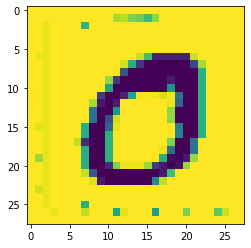

In [7]:
plt.imshow(img)

In [8]:
model.eval()
img = torch.tensor(img).view(-1,1,28,28).float().to('cuda')
with torch.no_grad():
    pred = model(img)

In [9]:
pred

tensor([[-2.5975e-04, -4.8262e-03, -2.8985e-03,  2.2895e-03, -4.7996e-03,
          2.8054e-03,  7.5383e-04,  1.3904e-03,  1.0077e+00,  4.0079e-03]],
       device='cuda:0')

In [10]:
labels_r[int(torch.argmax(pred[0]))]

4

In [11]:
model = CNN(idx_of_classes=idx).to(DEVICE)
criterion = CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.001)

In [ ]:
hp = Help_Funcs()
(
    PROJECT_NAME,
    name,
    epochs,
    X_train,
    y_train,
    X_test,
    y_test,
    batch_size,
    device,
    model,
    criterion,
    optimizer,
) = hp.train(
    PROJECT_NAME,
    "BaseLine CNN CrossEntropyLoss",
    125,
    X_train.view(-1, 1, 28, 28).to(DEVICE),
    y_train.to(DEVICE),
    X_test.view(-1, 1, 28, 28),
    y_test.to(DEVICE),
    BATCH_SIZE,
    DEVICE,
    model,
    criterion,
    optimizer,
    labels_r,
)

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd


  0%|                                           | 0/125 [00:00<?, ?it/s]
0it [00:00, ?it/s]
2802it [00:00, 28015.82it/s]
5887it [00:00, 29681.94it/s]
8987it [00:00, 30281.17it/s]
12070it [00:00, 30496.80it/s]
15186it [00:00, 30733.10it/s]
18297it [00:00, 30859.44it/s]
21383it [00:00, 30649.40it/s]
26250it [00:00, 30354.46it/s]

0it [00:00, ?it/s]
3035it [00:00, 30343.52it/s]
6152it [00:00, 30826.46it/s]
9275it [00:00, 31007.11it/s]
12379it [00:00, 31019.46it/s]
15750it [00:00, 30765.17it/s]
  1%|▎                                  | 1/125 [00:04<09:42,  4.70s/it]
0it [00:00, ?it/s]
2601it [00:00, 26002.59it/s]
5679it [00:00, 28808.88it/s]
8739it [00:00, 29625.84it/s]
11827it [00:00, 30118.98it/s]
14898it [00:00, 30328.81it/s]
17991it [00:00, 30530.75it/s]
21071it [00:00, 30615.16it/s]
26250it [00:00, 30031.57it/s]

0it [00:00, ?it/s]
2775it [00:00, 27744.93it/s]
5836it [00:00, 29425.62it/s]
8915it [00:00, 30045.39it/s]
11920it [00:00, 29838.38it/s]
15750it [00:00, 29732.73it/s]
  2%|▌  

In [ ]:
img = cv2.imread(f'./Model/tests/{os.listdir("./Model/tests/")[0]}')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = cv2.resize(img,(28,28))
img = img / 255.0

In [ ]:
plt.imshow(img)

In [ ]:
model.eval()
img = torch.tensor(img).view(-1,1,28,28).float().to('cuda')
with torch.no_grad():
    pred = model(img)

In [ ]:
pred

In [ ]:
labels_r[int(torch.argmax(pred[0]))]